In [1]:
# import required modules
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import names as input list:
lines_list = []
with open("/kaggle/input/makemore-names-txt/names.txt") as file:
    lines_list = [line.strip() for line in file]

In [3]:
# prepare vocab
vocab_list = sorted(list(set(''.join(lines_list))))
itos = {}
stoi = {}
for i in range(1,27):
    itos.update({i: vocab_list[i-1]})
itos[0] = '.'
stoi = {i:j for j, i in itos.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
# constants
context_size = 3
n_embed = 10
n_hidden = 200
vocab_size = len(itos)

In [5]:
# prepare dataset of input and output characters (bigram)
dataset_x_list = []
dataset_y_list = []
for name in lines_list:
    context = [0]*context_size
    for i in (list(name) + ['.']):
        iy = stoi[i]
        dataset_x_list.append(context)
        dataset_y_list.append(iy)
        context = context[1:] + [iy]
print(len(dataset_x_list), len(dataset_y_list))

228146 228146


In [6]:
# layers and parameters
X = torch.tensor(dataset_x_list)
Y = torch.tensor(dataset_y_list)
print(X.shape, X.dtype, Y.shape, Y.dtype)

torch.Size([228146, 3]) torch.int64 torch.Size([228146]) torch.int64


In [7]:
# initialize embeddings table
C = torch.randn(vocab_size, n_embed, requires_grad=True)

In [8]:
# initial weights and biases
# RNN parameters
Wxh = torch.randn(n_embed, n_hidden, requires_grad=True) # input -> hidden
Whh = torch.randn(n_hidden, n_hidden, requires_grad=True) # hidden -> hidden
Bh = torch.zeros(n_hidden, requires_grad=True)
# output layer
Why = torch.randn(n_hidden, vocab_size, requires_grad=True)
By = torch.zeros(vocab_size, requires_grad=True)

# gather all param
parameters = [C, Wxh, Whh, Bh, Why, By]
learning_rate = 0.1

In [9]:
# set grad true for all params
for p in parameters:
    p.requires_grad = True

In [10]:
# learning rate (dynamic)
lre = torch.linspace(-3, 0, 50000)
lrs = 10**lre
len(lrs)

50000

In [11]:
# lists to store loss and steps
lossl = []
lrsl = []

In [12]:
# forward pass
for step in range(50000):
    
    # mini batch
    ix = torch.randint(0, X.shape[0], (32,))
    xbatch = X[ix]
    ybatch = Y[ix]

    # hidden state (initially zero)
    h = torch.zeros(xbatch.shape[0], n_hidden)

    # unrolling
    for t in range(context_size):
        emb = C[xbatch[:, t]] # (B, n_embed)
        h = torch.tanh(emb @ Wxh + h @ Whh + Bh)

    # calculate logits using final hidden state
    logits = h @ Why + By
    loss = F.cross_entropy(logits, ybatch)

    # backward pass
    for p in parameters:
        p.grad = None
    # calculate gradients
    loss.backward()
    
    # udpate params based on gradients
    lr = lrs[50000 - step - 1]
    for p in parameters:
        p.data += -lr* p.grad

    # store loss for visualization
    lrsl.append(step)
    lossl.append(loss.item())

2.2218258380889893

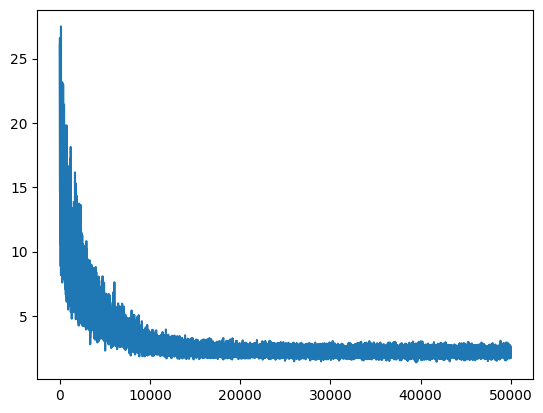

In [13]:
plt.plot(torch.arange(len(lossl)), lossl)
loss.item()

In [14]:
# sampling from trained model
g = torch.Generator().manual_seed(343439843 + 11)
for _ in range(20):
    out = []
    context = [0] * context_size
    h = torch.zeros(1, n_hidden)
    
    while True:
        ix = context[-1]
        emb = C[torch.tensor([ix])]
        h = torch.tanh(emb @ Wxh + h @ Whh + Bh)
        logits = h @ Why + By
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[k] for k in out))

had.
quabbalyn.
ian.
vyn.
hun.
aablai.
emahder.
komud.
gyrukwus.
vizacyanamaetry.
alee.
ajosanna.
orrynly.
huston.
luciana.
lamimare.
vy.
han.
lyn.
hmanon.
